In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus= False)

In [4]:
data = {
    '영화' : ['명량', '극한 직업', '신과 함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번 방의 선물', '암살'],
    '개봉연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270],
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}

In [5]:
type(data)

dict

In [6]:
import pandas as pd
df = pd.DataFrame(data)
df

,영화,개봉연도,관객수,평점
0,명량,2014,1761,8.88
1,극한 직업,2019,1626,9.20
2,신과 함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번 방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [ ]:
group = df.groupby(['개봉연도'])['관객수'].sum().to_frame()
group

,관객수
개봉연도,
2006,1301
2012,1298
2013,1281
2014,3187
2015,1270
2017,1441
2019,1626


In [14]:
df2 = group.copy()
df2.reset_index(inplace=True)
df2

,개봉연도,관객수
0,2006,1301
1,2012,1298
2,2013,1281
3,2014,3187
4,2015,1270
5,2017,1441
6,2019,1626


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   개봉연도    7 non-null      int64
 1   관객수     7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [16]:
df2['개봉연도'] = df2['개봉연도'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개봉연도    7 non-null      object
 1   관객수     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [22]:
min = df2['관객수'].min()
min

np.int64(1270)

In [23]:
max = df2['관객수'].max()
max

np.int64(3187)

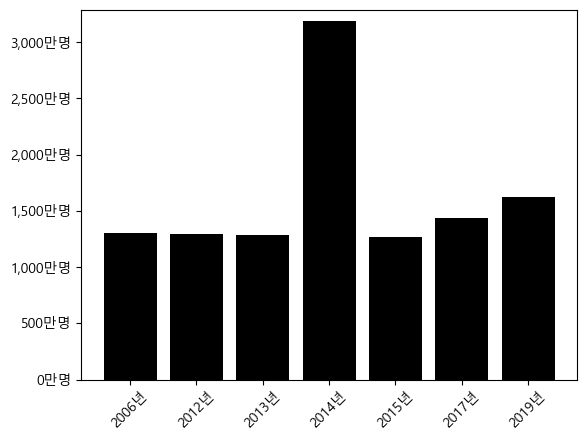

In [27]:
plt.bar(df2['개봉연도'], df2['관객수'], color='black')
xticks = [x+'년' for x in df2['개봉연도']]
plt.xticks(df2['개봉연도'], xticks, rotation = 45)
plt.ylim(0, max+100)
yticks = [y for y in range(0, max+101, 500)]
plt.yticks(yticks, [f'{ytick:,}만명' for ytick in yticks])
plt.show()

In [28]:
group = df.groupby('개봉연도')['평점'].mean()
group

개봉연도
2006    8.62
2012    7.64
2013    8.83
2014    9.02
2015    9.10
2017    8.73
2019    9.20
Name: 평점, dtype: float64

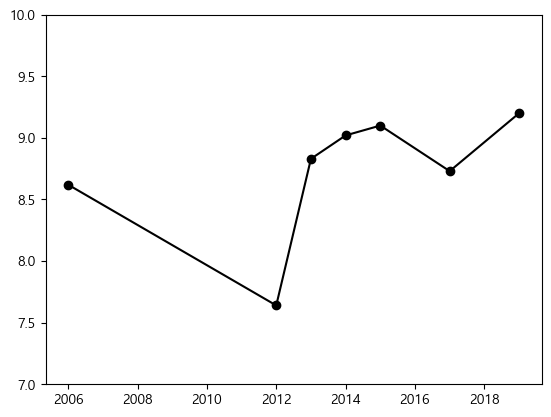

In [37]:
import numpy as np
plt.plot(group.index, group.values, color='black', marker='o')
plt.ylim(7, 10)
yticks = [y for y in np.arange(7.0, 10.5, 0.5)]
plt.yticks(yticks)
plt.show()